In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
CF = 0.453

def get_chinup_data():
    linnerud = datasets.load_linnerud()
    X = linnerud.target[:,0]
    X = [weight * CF for weight in X]
    X = np.array(X).reshape(20,1)
    
    y = np.array(linnerud.data[:,0])
    
    return X, y

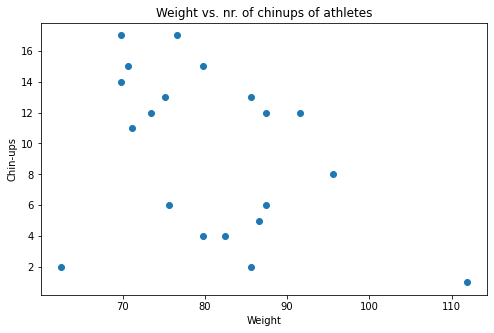

In [5]:
x, y = get_chinup_data()

plt.figure(figsize=(8,5))  # Set size of figure
plt.scatter(x, y)  # Make a scatterplot of the weights vs. chin-ups
plt.title("Weight vs. nr. of chinups of athletes")  # Set title
plt.xlabel("Weight")  # Set label to x-axis
plt.ylabel("Chin-ups")  # Set label to y-axis
plt.show()

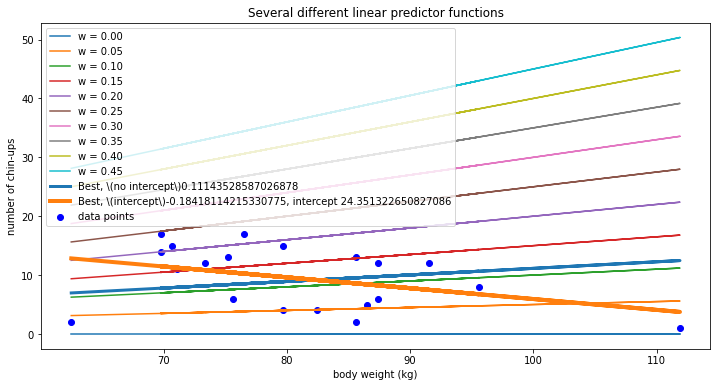

In [7]:
from sklearn.linear_model import LinearRegression

x, y = get_chinup_data()

# Define the coefficients w for the different predictors (0,0.05,...,0.45)
coefficients = np.linspace(0, 0.45, 10)

# Plot the datapoints and generated predictor functions from the linear hypothesis space
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Create Figure and Axes object

# Make a scatterplot of the data
axes.scatter(x, y, color='blue', label="data points") 


# Plot the predictor function for each regression coefficient w in 'coefficients'
for w in coefficients: 
    y_pred = w*x  # Calculate the predictor function
    label = f"w = {w:.2f}"  # Format the label for the legend
    axes.plot(x, y_pred, label=label)  # Plot the predictor function

reg = LinearRegression(fit_intercept=False)
reg.fit(x,y)
y_pred = reg.predict(x)
label = "Best, \(no intercept\)" + str(reg.coef_[0])
axes.plot(x, y_pred, label=label, linewidth=3.0)
    
reg_intercept = LinearRegression(fit_intercept=True)
reg_intercept.fit(x,y)
y_pred = reg_intercept.predict(x)
label = "Best, \(intercept\)" + str(reg_intercept.coef_[0]) + ", intercept "+ str(reg_intercept.intercept_)
axes.plot(x, y_pred, label=label, linewidth=4.0)
    
    
    
    
axes.set_title('Several different linear predictor functions')  # Set plot title
axes.set_xlabel('body weight (kg)')  # Set x-axis label
axes.set_ylabel('number of chin-ups')  # Set y-axis label
axes.legend(loc='upper left')  # Set location of the legend to show in upper left corner
plt.show()